# Modelo de Depredador-Presa

En este documento presentamos el modelo biológico de __Lotka-Volterra__, que representa la dinámica de dos especies, en la cual una es el depredador de la otra. 


## Las ecuaciones de Lotka-Volterra

Dadas $x_1(t)$ e $x_2(t)$ la población de la presa (liebres) y depredador (lince), el modelo determina que la tasa de crecimiento de estas especies es: 


$$\frac{dx_1}{dt} = rx_1-ax_1x_2,$$
$$\frac{dx_2}{dt} = bx_1x_2-mx_2,$$

donde $r$ es la tasa de crecimiento de las liebres, $m$ es la tasa de mortalidad de los linces si no encuentran presas, $a$ es la tasa de mortalidad de las liebres debido a los encuentros con linces y $b$ indican la sobrevivencia de los linces debida a los encuentros con liebres. 

El modelo incluye varias suposiciones que hay que tener en cuenta: 

* La población de las liebres crece ilimitadamente en ausencia de linces.
* Los linces depeden de las liebres para sobrevivir.

Entonces, buscamos: **a)** Simular el modelo; **b)** Estudiar el efecto del tiempo de paso en la simulación; **c)** Simular el modelo con los método de Runge Kutta.


# Simulación del modelo de Lotka-Volterra

Implementamos el modelo en Python:

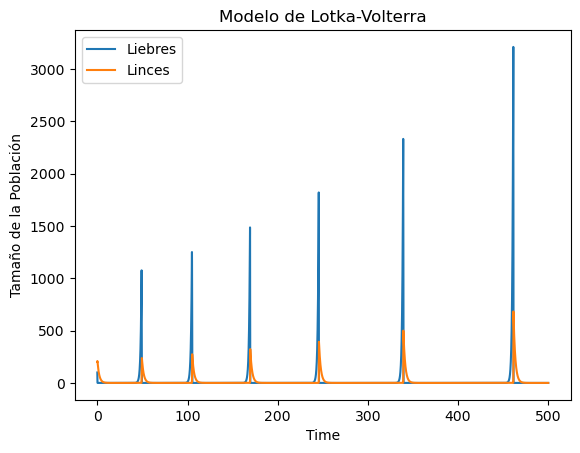

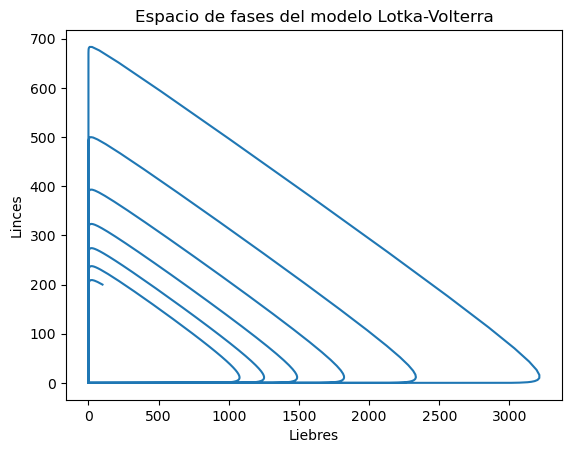

In [3]:
###LIBRERÍAS
##-------------------------------
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

"""" definición del modelo"""

def sys(x, t, r,a,m,b):
    dx1dt=(r-a*x[1])*x[0]
    dx2dt=(b*x[0]-m)*x[1]
    return np.array([dx1dt, dx2dt])

"""" definición del intervalo de tiempo"""

timestep = 0.01 #probar con 1, 0.1, 0.01, 0.001, 0.0001
t0=0
tf=500
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" definición de los parámetros"""
r = 1  # birth rate of rabbits
a = 0.1 # death rate of rabbits due to predation
m = 0.5 # natural death rate of lynx
b = 0.02 # factor that describes surviving of lynx due to predation

"""" valores iniciales de las variables de estado"""
x1_0=100
x2_0=200
x0 = np.array([100, 200])


"""" aplicando el método de euler"""

def solveODE_euler(f, x0, t, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *args)
    return x

sol = solveODE_euler(sys, x0, t, args=(r,a,m,b))

""""gráficas"""

x1_sim=sol[:,0]
x2_sim=sol[:,1]

# visualization of deterministic populations against time
plt.plot(t, x1_sim)
plt.plot(t, x2_sim)
plt.xlabel('Time')
plt.ylabel('Tamaño de la Población')
plt.legend(('Liebres', 'Linces'))
plt.title('Modelo de Lotka-Volterra')
plt.show()

# deterministic phase portrait
plt.plot(x1_sim,x2_sim)
plt.xlabel('Liebres')
plt.ylabel('Linces')
plt.title('Espacio de fases del modelo Lotka-Volterra')
plt.show()


En la primera gráfica se observa un comportamiento oscilatorio en las dos poblaciones. Si hay abundancia de liebres, los linces tienen más alimento y crecen en población, hasta llegar a un punto en el que la población de las presas decrece, seguida de los depredadores. Ante la ausencia de depredadores, las presas se reproducen con intensidad, produciéndose un nuevo ciclo. 

La segunda gráfica se denomina __diagrama de fases__, y muestra que la población de las presas y depredadores tiene un comportamiento estable y oscilatorio. 

### Errores en la simulación

En un modelo en tiempo continuo con más de una variable de estado es frecuente que el método numérico de solución del sistema diferencial tenga errores significativos. En el caso anterior aplicamos el Método de Euler. Podemos observar que el tamaño del paso del tiempo influye significativamente en la solución obtenida. 

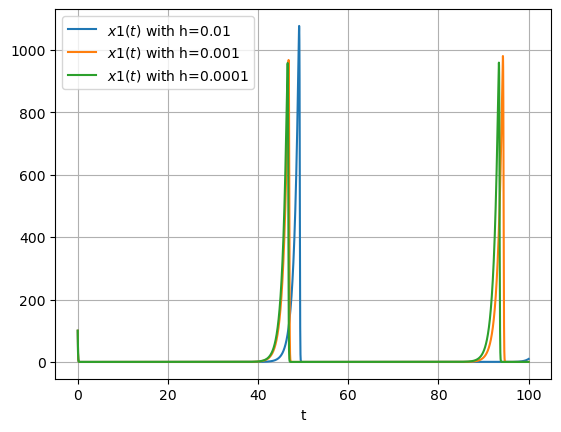

In [29]:
"""" aplicando Euler para distintos timestep"""

timestep=0.01
t1 = np.linspace(t0, tf, int((tf-t0)/timestep+1))
sol1 = solveODE_euler(sys, x0, t1, args=(r,a,m,b))

timestep=0.001
t2 = np.linspace(t0, tf, int((tf-t0)/timestep+1))
sol2 = solveODE_euler(sys, x0, t2, args=(r,a,m,b))

timestep=0.0001
t3 = np.linspace(t0, tf, int((tf-t0)/timestep+1))
sol3 = solveODE_euler(sys, x0, t3, args=(r,a,m,b))


plt.plot(t1, sol1[:, 0], label=r'$x1(t)$ with h=0.01')
plt.plot(t2, sol2[:, 0], label=r'$x1(t)$ with h=0.001')
plt.plot(t3, sol3[:, 0], label=r'$x1(t)$ with h=0.0001')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


Para corregir estos errores en la solución numérica, hay métodos alternativos que se ajustan mejor a la solución exacta del modelo diferencial. Por ejemplo, los métodos de Runge-Kutta. 

### Método de Runge-Kutta de orden 2

Dado el sistema $\dot{x}=f(t,x)$ y $h=t_{n+1}-t_n$, con $n$ el índice del vector de tiempo, la siguiente ecuación: 

$$x_{n+1}=x_n+hf(t+\frac{h}{2},x_n+\frac{h}{2}f(t,x_n)),$$
 
se aproxima a la solución exacta del sistema. Su implementación en código es la siguiente:   

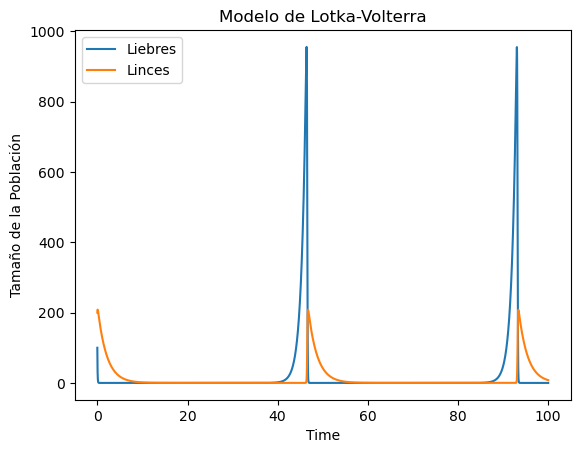

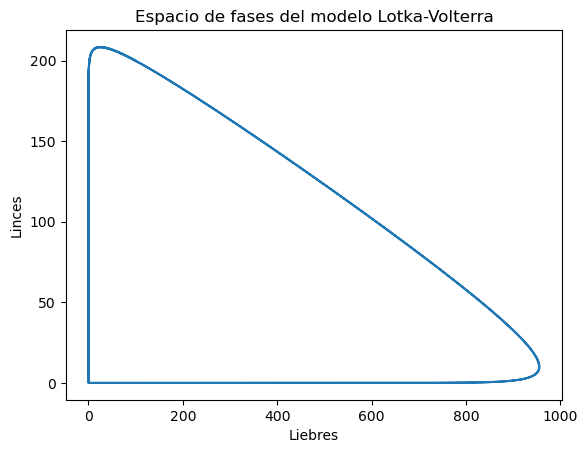

In [5]:
"""" aplicando el método de Runge-Kutta 2"""

timestep = 0.01 #probar con 1, 0.1, 0.01, 0.001, 0.0001
t0=0
tf=100
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

def solveODE_RK2(f, x0, t, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        x[i+1] = x[i] + h * f(x[i] + f(x[i], t[i], *args) * h / 2., t[i] + h / 2., *args)
    return x

sol = solveODE_RK2(sys, x0, t, args=(r,a,m,b))

""""gráficas"""

x1_sim=sol[:,0]
x2_sim=sol[:,1]

# visualization of deterministic populations against time
plt.plot(t, x1_sim)
plt.plot(t, x2_sim)
plt.xlabel('Time')
plt.ylabel('Tamaño de la Población')
plt.legend(('Liebres', 'Linces'))
plt.title('Modelo de Lotka-Volterra')
plt.show()

# deterministic phase portrait
plt.plot(x1_sim,x2_sim)
plt.xlabel('Liebres')
plt.ylabel('Linces')
plt.title('Espacio de fases del modelo Lotka-Volterra')
plt.show()



Se observa que la aproximación de la solución exacta (oscilaciones estables) es mejor que con el método de Euler, incluso para mayores incrementos del tiempo. Existen métodos de Runge-Kutta de orden superior que aseguran una aproximación aún más precisa. 

### Método de Runge-Kutta de orden 4

La ecuación recursiva: 

$$x_{n+1}=\frac{h}{6}(k_1+2k_2+2k_3+k_4),$$

con 

$$\left\{\begin{array}{l} k_1=f(x_n,t_n)\\ k_2=f(x_n+\frac{h}{2} k_1,t_n+\frac{h}{2})\\
k_3=f(x_n+\frac{h}{2} k_2,t_n+\frac{h}{2})\\ k_4=f(x_n+h k_3,t_n+h)\end{array}\right.$$
 
se aproxima a la solución exacta del sistema. Su implementación en código es la siguiente:   


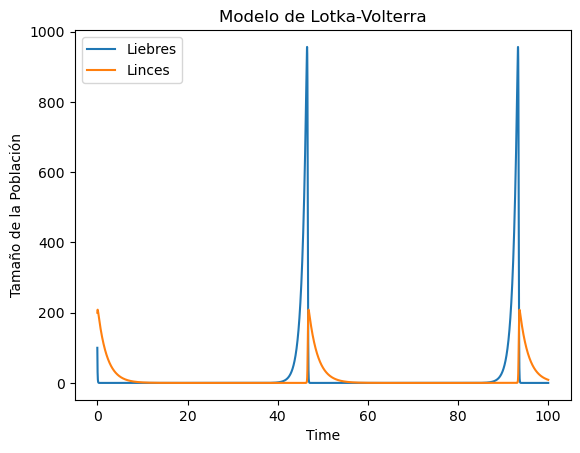

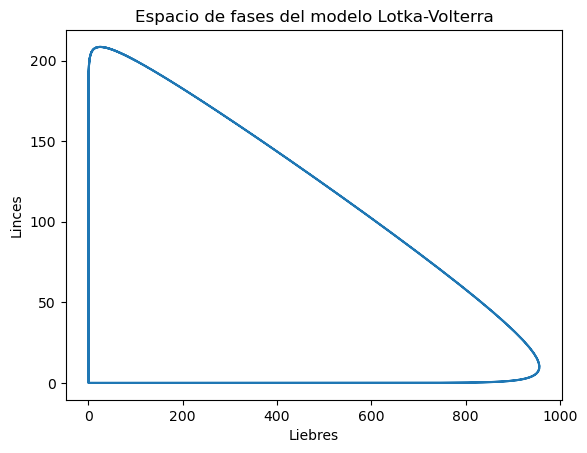

In [9]:
"""" aplicando el método de Runge-Kutta 4"""

timestep = 0.01 #probar con 1, 0.1, 0.01, 0.001, 0.0001
t0=0
tf=100
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))


def solveODE_RK4(f, x0, t, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i], *args)
        k2 = f(x[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(x[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(x[i] + k3 * h, t[i] + h, *args)
        x[i+1] = x[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return x

sol = solveODE_RK4(sys, x0, t, args=(r,a,m,b))

""""gráficas"""

x1_sim=sol[:,0]
x2_sim=sol[:,1]

# visualization of deterministic populations against time
plt.plot(t, x1_sim)
plt.plot(t, x2_sim)
plt.xlabel('Time')
plt.ylabel('Tamaño de la Población')
plt.legend(('Liebres', 'Linces'))
plt.title('Modelo de Lotka-Volterra')
plt.show()

# deterministic phase portrait
plt.plot(x1_sim,x2_sim)
plt.xlabel('Liebres')
plt.ylabel('Linces')
plt.title('Espacio de fases del modelo Lotka-Volterra')
plt.show()


Por último, a modo de comparación, resolvemos la ecuación utilizando la instrucción __odeint__ del paquete **scipy**, graficando las solución con la obtenida con el método de Runge-Kutta de orden 4.

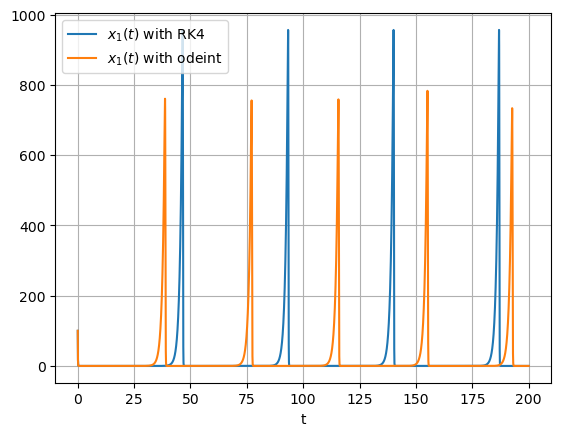

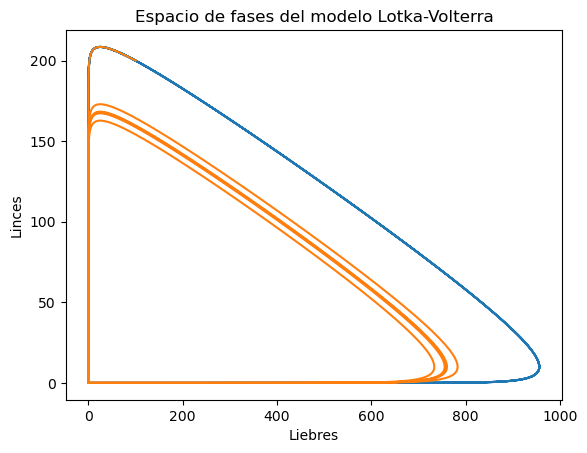

In [11]:

timestep = 0.01 #probar con 1, 0.1, 0.01, 0.001, 0.0001
t0=0
tf=200
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" aplicando RK4"""

sol1 = solveODE_RK4(sys, x0, t, args=(r,a,m,b))
x1_sim1=sol1[:,0]
x2_sim1=sol1[:,1]

"""" aplicando odeint"""

sol2 = odeint(sys, x0, t, args=(r,a,m,b))
x1_sim2=sol2[:,0]
x2_sim2=sol2[:,1]


plt.plot(t, sol1[:, 0], label=r'$x_1(t)$ with RK4')
plt.plot(t, sol2[:, 0], label=r'$x_1(t)$ with odeint')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# deterministic phase portrait
plt.plot(x1_sim1,x2_sim1, label=r'RK4')
plt.plot(x1_sim2,x2_sim2, label=r'odeint')
plt.xlabel('Liebres')
plt.ylabel('Linces')
plt.title('Espacio de fases del modelo Lotka-Volterra')
plt.show()



Observamos que la aproximación obtenida con RK4 es más exacta que la que nos propone la instrucción __odeint__. 

## Comparación del modelo con evidencias empíricas

El siguiente gráfico muestra los registros de las poblaciones del lince canadiense y la liebre de patas blancas recogidos por la compañía Hudson Bay a lo largo de un siglo:

![alt text](https://services.math.duke.edu/education/ccp/materials/engin/predprey/lynxhare.gif)

Se puede comprobar que existe un comportamiento oscilatorio interrelacionado en ambas especies, de acuerdo a lo esperado por el modelo de Lotka-Volterra.

## Referencias

[1] - Hills, A. (2023). Modelling Predator-Prey Systems in Python.https://github.com/INASIC/predator-prey_systems/tree/master

[2] - Hoppensteadt, F. (2006). "Predator-prey model". Scholarpedia. p. 1563.

[3] - Velten, K. (2010). Mathematical Modeling and Simulation. Wiley.